<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/trabajos/NYCTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colour
from colour import Color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from matplotlib.colors import LogNorm

In [ ]:
from google.colab import files
files.upload()

# **Introducción**

En esta práctica se pretende analizar un dataset sobre el servicio de taxis de NuevaYork para intentar encontrar datos interesantes que no se pueden observar a simple vista

In [ ]:
df = pd.read_csv("NYCTaxiFares.csv")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


Aquí vemos los datos disponibles en el dataset, que vamos a extender con algunos datos extras, como la distancia recorrida o el desglose de el timestamp para facilitar el procesado de los datos

In [ ]:
df.shape

(120000, 8)

Dato interesante -> Distancia recorrida en km

In [ ]:
def haversine_distance(df, lat1, lon1, lat2, lon2):
  #Calculate the haversine distance between d2 sets of gps coordinates in df
  r = 6371 # average radius of Earth in KM
  phi1 = np.radians(df[lat1])
  phi2 = np.radians(df[lat2])

  delta_phi = np.radians(df[lat2] - df[lat1])
  delta_lambda = np.radians(df[lon2] - df[lon1])

  a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  d = (r*c)

  return d

In [ ]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
my_time = df['pickup_datetime'][0]
df['EDT'] = df['pickup_datetime'] - pd.Timedelta(hours=4)
df['Hour'] = df['EDT'].dt.hour
df['Weekday'] = df['EDT'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDT,Hour,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,Fri


# Frecuencia de viajes en taxi según la hora y el día de la semana

Agrupar por horas y días de la semana la frecuencia de viajes realizados y mostrarlos en una gráfica

<BarContainer object of 7 artists>

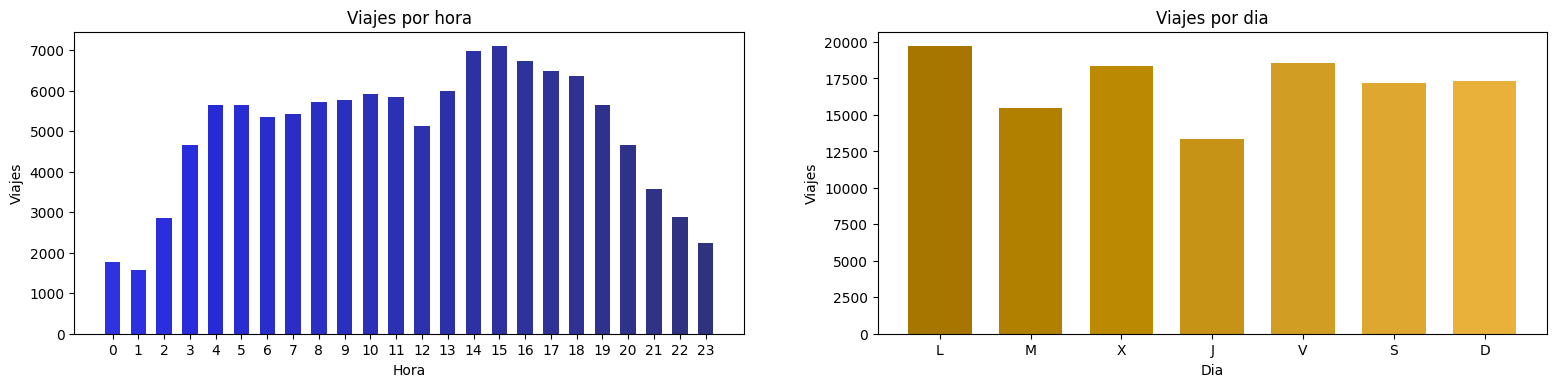

In [ ]:
h = np.linspace(0,23,24)
d= np.array(["L","M","X","J","V","S","D"])
co = ['#a67600', '#b18000', '#bc8903', '#c79316', '#d29d23', '#dea72f', '#e9b13a']
red = Color("#2F32E0")
c2= list(red.range_to(Color("#2F327C"),24))
c3 = []
for c in c2:
  c3.append(c.hex)
t = df.groupby(['Hour'])['EDT'].count()
wd = df.groupby(['Weekday'])['Weekday'].count()
plt.figure(figsize=(19,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.xlabel("Hora")
plt.ylabel("Viajes")
plt.title("Viajes por hora")
plt.xticks(h)
plt.bar(h,t,align='center', width=0.6, color=c3)
plt.subplot(1,2,2)
plt.xlabel("Dia")
plt.ylabel("Viajes")
plt.title("Viajes por dia")
plt.bar(d,wd, align='center', width=0.7, color=co)

Como se puede comprobar en las gráficas generada de "Viajes por hora" la cantidad de gente que viaja en taxi suele ser menor por la noche, tambien se puede comprobar como en la gráfica de "Viajes por día" los jueves es el dia más flojo respecto a afluencia de gente. También se podría realizar otras gráficas por ejemplo que mostraran el desglose de horas por dia de la semana obteniendo así unos datos aún más completos.

Con estos datos podriamos determinar cuando es necesario que exista una mayor cantidad de taxis disponbiles.

# Progresión de la tasa con respecto a los km recorridos, clase del viaje y número de pasajeros




1.   Evaluar progresión de la tasa según los km
2.   Evaluar progresión de la tasa según la clase
3.   Evaluar progresión de la tasa según el nº pasajeros



<BarContainer object of 29 artists>

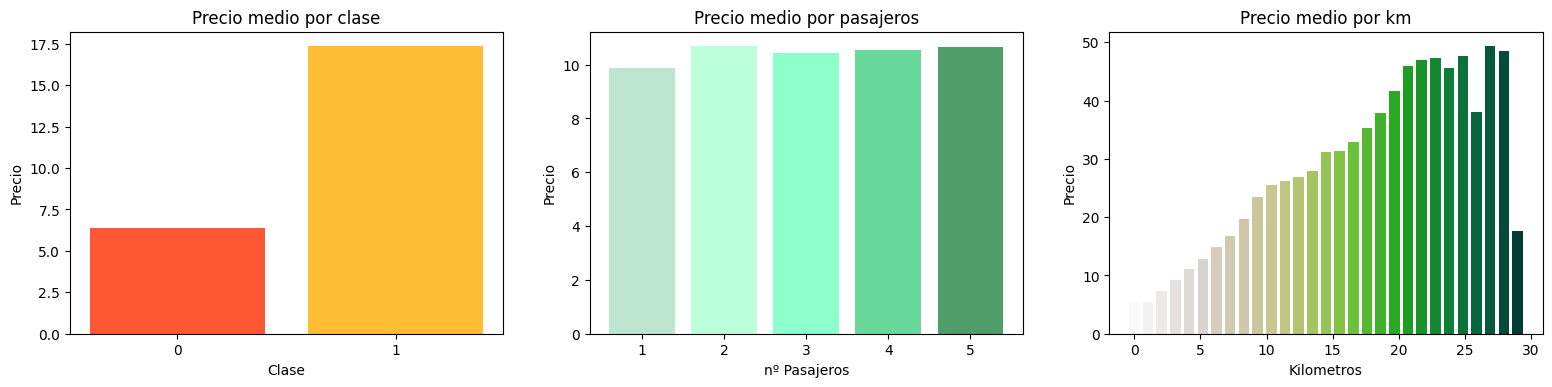

In [ ]:
plt.figure(figsize=(19,4), dpi= 100, facecolor='w', edgecolor='k')
# Según la clase
byClass = df.groupby(['fare_class'])['fare_amount'].mean()
plt.subplot(1,3,1)
plt.xlabel("Clase")
plt.ylabel("Precio")
plt.xticks([0,1])
plt.title("Precio medio por clase")
plt.bar([0,1],byClass,color=["#ff5733","#ffbd33"])
# Según los pasajeros
plt.subplot(1,3,2)
byPassenger = df.groupby(['passenger_count'])['fare_amount'].mean()
plt.xlabel("nº Pasajeros")
plt.ylabel("Precio")
plt.xticks([1,2,3,4,5])
plt.title("Precio medio por pasajeros")
plt.bar([1,2,3,4,5],byPassenger,color=["#bee6ce","#bcffdb","#8dffcd","#68d89b","#4f9d69"])
# Segú los km
plt.subplot(1,3,3)
df['dist_km_r']  = np.round(df['dist_km'])
byKm = df.groupby(['dist_km_r'])['fare_amount'].mean()
plt.xlabel("Kilometros")
plt.ylabel("Precio")
plt.title("Precio medio por km")
white= Color("#fafafa")
c2= list(white.range_to(Color("#002e2c"),30))
c3 = []
for c in c2:
  c3.append(c.hex)
aux=np.linspace(0,len(byKm),len(byKm))
plt.bar(aux,byKm,color=c3)

En este apartado se pueden comprobar diversos aspectos referentes a como varía el precio del viajes en función de otros factores. Dependiendo de la clase vemos como la clase 0 es claramente más barata que la 1. Otra cosa que se puede observar es que la cantidad de pasajeros no afecta al precio final , por lo que se podría deducir por ejemplo que si sube una mayor cantidad de gente no lo hace generalmente para ahorrar costes, ya que hacen trayectos que cuestan lo mismo que a las personas que van solas.

Por otro lado vemos como evidentemente, el precio medio por kilometro aumenta a medida que el viaje es más lejos, a excepción del final que vemos cierta anomalía seguramente debía a valores atípicos.

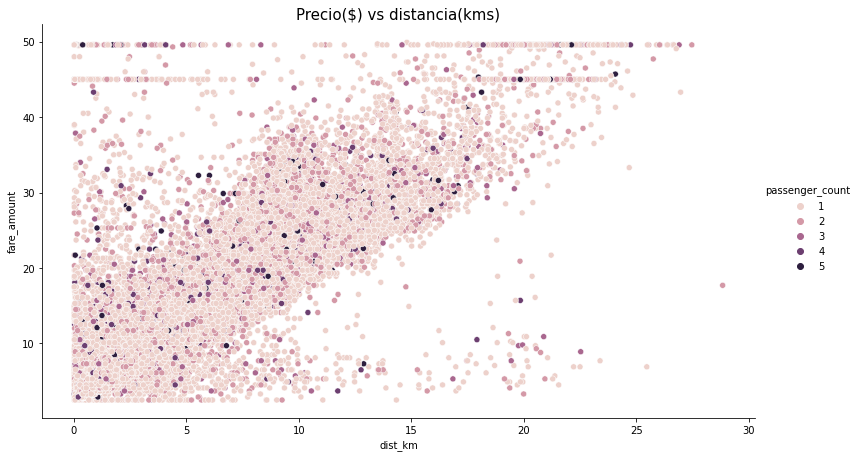

In [ ]:
sns.relplot(data = df, kind = "scatter",x = "dist_km",y = "fare_amount",
            hue = "passenger_count",height=6 ,aspect = 1.75,)
plt.title("Precio($) vs distancia(kms)" , fontsize=15)
plt.show()

En esta gráfica se pone en conjunto 3 factores clave, el precio, la distancia y la cantidad de pasajeros.

Se puede observar una clara linea ascendente del precio respecto a la cantidad de kilometros, además vemos la cantidad de valores atípicos al final que nos han causado la distorsión de la gráfica anterior.

# Zonas más visitadas
Lo que pretendemos en este apartado es crear agrupaciones para analizar cómo se relacionan entre sí y si tienen un comportamiento similar. Con esto, y como posiblidades futuras, podríamos obtener qué zonas son menos visitadas con el fin de llevar a cabo acciones promocionales y, a su vez, intentar detectar posibles fraudes, ya sea a partir de las distancias recorridas (dos viajes similares no pueden tener distancias muy distintas) o búsquedas de precios desorbitados.


VISUALIZACIÓN DE LAS LOCALIZACIONES DE SALIDA Y LLEGADA

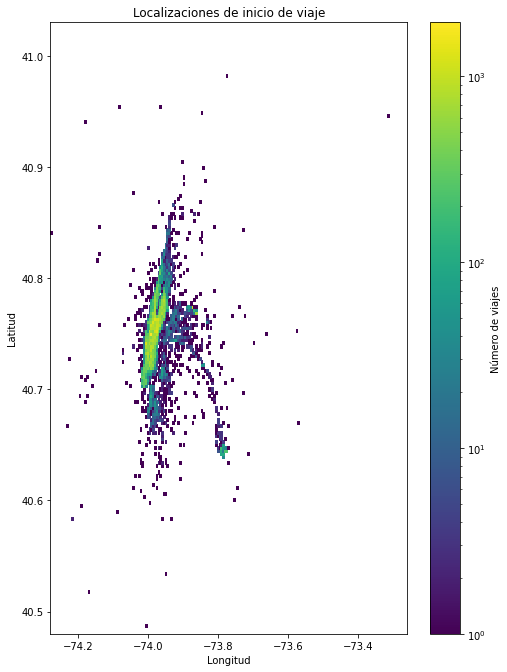

In [ ]:
latmin = 40.48
lonmin = -74.28
latmax = 41.03
lonmax = -73.26
ratio = np.cos(40.7 * np.pi/180) * (lonmax-lonmin) /(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(df.pickup_longitude,df.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Localizaciones de inicio de viaje')
plt.colorbar(label='Número de viajes')
plt.show()

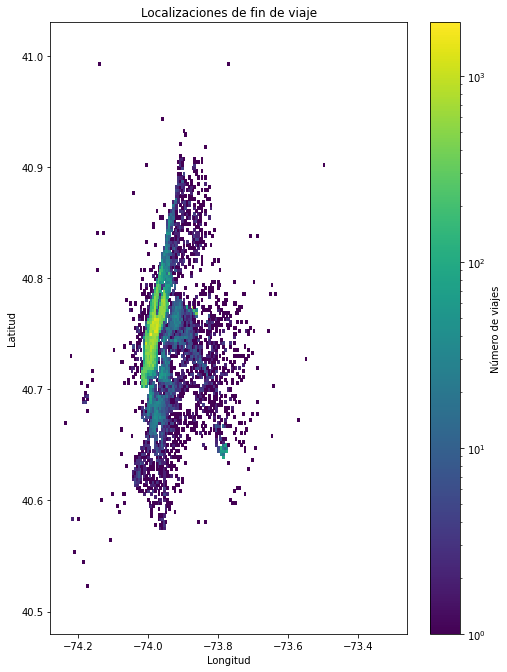

In [ ]:
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(df.dropoff_longitude,df.dropoff_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Localizaciones de fin de viaje')
plt.colorbar(label='Número de viajes')
plt.show()

ESTUDIO BREVE DE LOS VIAJES MÁS REALIZADOS (SE AGRUPAN LAS CARRERAS POR BLOQUES (ZONAS))

Para ello hemos cargado otro dataset que divide el mapa de New York en un grid de 200x200

In [ ]:
blocks = pd.read_csv('census_block_loc.csv')
blocks.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


Clasificamos los viajes por zonas (de salida y de llegada) a partir de sus posiciones dadas en latitud y longitud

In [ ]:
df['unique_id'] = np.arange(df.shape[0])
blocks_lat = pd.DataFrame(pd.unique(blocks.Latitude), columns=['Latitude'])
blocks_lon = pd.DataFrame(pd.unique(blocks.Longitude), columns=['Longitude'])

In [ ]:
#PICKUPS
df["a_join"] = df.pickup_latitude
df_ordenado = df.sort_values(by='a_join', ascending=True)
blocks_lat["a_join"] = blocks_lat.Latitude
blocks_ordenado = blocks_lat.sort_values(by='a_join', ascending=True)
bloque_inicio = pd.merge_asof(df_ordenado, blocks_ordenado, on="a_join", direction="forward")
bloque_inicio = bloque_inicio[["unique_id", "pickup_datetime", "fare_amount", "fare_class", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "dist_km", "Latitude"]]
# Cambiamos el nombre al campo para volver a cruzar
bloque_inicio = bloque_inicio.rename(columns={'Latitude':'Latitude_Ini'})

bloque_inicio["a_join"] = bloque_inicio.pickup_longitude
df_ordenado = bloque_inicio.sort_values(by='a_join', ascending=True)
blocks_lon["a_join"] = blocks_lon.Longitude
blocks_ordenado = blocks_lon.sort_values(by='a_join', ascending=True)
bloque_inicio = pd.merge_asof(df_ordenado, blocks_ordenado, on="a_join", direction="forward")
bloque_inicio = bloque_inicio[["unique_id", "pickup_datetime", "fare_amount", "fare_class", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "dist_km", "Latitude_Ini", "Longitude"]]
# Volvemos a cambiarle el nombre para dejarlo como estaba
bloque_inicio = bloque_inicio.rename(columns={'Latitude_Ini':'Latitude'})


#DROPOFFS
df["a_join"] = df.dropoff_latitude
df_ordenado = df.sort_values(by='a_join', ascending=True)
blocks["a_join"] = blocks.Latitude
blocks_ordenado = blocks.sort_values(by='a_join', ascending=True)
bloque_destino = pd.merge_asof(df_ordenado, blocks_ordenado, on="a_join", direction="forward")
bloque_destino = bloque_destino[["unique_id", "pickup_datetime", "fare_amount", "fare_class", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "dist_km", "Latitude"]]
# Cambiamos el nombre al campo para volver a cruzar
bloque_destino = bloque_destino.rename(columns={'Latitude':'Latitude_Fin'})

bloque_destino["a_join"] = bloque_destino.dropoff_longitude
df_ordenado = bloque_destino.sort_values(by='a_join', ascending=True)
blocks["a_join"] = blocks.Longitude
blocks_ordenado = blocks.sort_values(by='a_join', ascending=True)
bloque_destino = pd.merge_asof(df_ordenado, blocks_ordenado, on="a_join", direction="forward")
bloque_destino = bloque_destino[["unique_id", "pickup_datetime", "fare_amount", "fare_class", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "dist_km", "Latitude_Fin", "Longitude"]]
# Volvemos a cambiarle el nombre para dejarlo como estaba
bloque_destino = bloque_destino.rename(columns={'Latitude_Fin':'Latitude'})


#UNIMOS LAS CARRERAS(VIAJES TAXI) CON LOS BLOCKS
bloque_inicio = pd.merge(bloque_inicio, blocks, on=['Latitude', 'Longitude'])
bloque_destino = pd.merge(bloque_destino, blocks, on=['Latitude', 'Longitude'])

In [ ]:
bloque_inicio.head()

,unique_id,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,Latitude,Longitude,BlockCode,County,State,a_join
0,36567,2010-04-12 18:23:18+00:00,32.27,1,-74.465447,40.793332,-74.443323,40.801823,1,2.087994,40.794322,-74.280000,340130173021010,Essex,NJ,-74.280000
1,115130,2010-04-13 04:31:00+00:00,18.90,1,-74.300528,40.501170,-74.213302,40.554577,1,9.466564,40.502613,-74.280000,340230048003007,Middlesex,NJ,-74.280000
2,8982,2010-04-22 00:12:00+00:00,22.10,1,-74.275452,40.840107,-74.323862,40.828805,5,4.262233,40.841809,-74.273668,340130217013003,Essex,NJ,-74.273668
3,46806,2010-04-11 15:55:00+00:00,5.30,0,-74.232158,40.665703,-74.236590,40.669745,1,0.584579,40.667688,-74.229347,340390318012002,Union,NJ,-74.229347
4,84047,2010-04-12 19:58:24+00:00,7.30,0,-74.226295,40.728648,-74.222500,40.729907,1,0.349082,40.728744,-74.226181,340130119001000,Essex,NJ,-74.226181


In [ ]:
bloque_destino.head()

,unique_id,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,Latitude,Longitude,BlockCode,County,State,a_join
0,36567,2010-04-12 18:23:18+00:00,32.27,1,-74.465447,40.793332,-74.443323,40.801823,1,2.087994,40.803367,-74.280000,340130173012004,Essex,NJ,-74.280000
1,8982,2010-04-22 00:12:00+00:00,22.10,1,-74.275452,40.840107,-74.323862,40.828805,5,4.262233,40.830503,-74.280000,340130209012000,Essex,NJ,-74.280000
2,46806,2010-04-11 15:55:00+00:00,5.30,0,-74.232158,40.665703,-74.236590,40.669745,1,0.584579,40.669950,-74.235678,340390321002008,Union,NJ,-74.235678
3,84047,2010-04-12 19:58:24+00:00,7.30,0,-74.226295,40.728648,-74.222500,40.729907,1,0.349082,40.731005,-74.219849,340130130001000,Essex,NJ,-74.219849
4,30996,2010-04-11 21:48:27+00:00,8.50,0,-74.216405,40.584498,-74.216813,40.584787,2,0.047114,40.586281,-74.216683,340230036001027,Middlesex,NJ,-74.216683


In [ ]:
bloques = pd.merge(bloque_inicio, bloque_destino, on=['unique_id'], suffixes=('_ini', '_dest'))
# El merge nos duplica todos los campos (_ini, _dest) excepto unique_id, con los mismos valores. Nos quedamos con todo _ini (información de pickups, incluido el bloque) y con los bloques de _dest (dropoffs)
bloques = bloques[["unique_id", "pickup_datetime_ini", "fare_amount_ini", "fare_class_ini", "pickup_longitude_ini", "pickup_latitude_ini", "dropoff_longitude_ini", "dropoff_latitude_ini", "passenger_count_ini", "dist_km_ini", "BlockCode_ini", "County_ini", "State_ini", "BlockCode_dest",	"County_dest",	"State_dest"]]
bloques = bloques.rename(columns={'pickup_datetime_ini':'pickup_datetime'})
bloques = bloques.rename(columns={'fare_amount_ini':'fare_amount'})
bloques = bloques.rename(columns={'fare_class_ini':'fare_class'})
bloques = bloques.rename(columns={'pickup_longitude_ini':'pickup_longitude'})
bloques = bloques.rename(columns={'pickup_latitude_ini':'pickup_latitude'})
bloques = bloques.rename(columns={'dropoff_longitude_ini':'dropoff_longitude'})
bloques = bloques.rename(columns={'dropoff_latitude_ini':'dropoff_latitude'})
bloques = bloques.rename(columns={'passenger_count_ini':'passenger_count'})
bloques = bloques.rename(columns={'dist_km_ini':'dist_km'})


In [ ]:
bloques["bloques_ini_des"] = bloques.BlockCode_ini.astype(str)  + "-" + bloques.BlockCode_dest.astype(str)
bloques.head()

,unique_id,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,BlockCode_ini,County_ini,State_ini,BlockCode_dest,County_dest,State_dest,bloques_ini_des
0,36567,2010-04-12 18:23:18+00:00,32.27,1,-74.465447,40.793332,-74.443323,40.801823,1,2.087994,340130173021010,Essex,NJ,340130173012004,Essex,NJ,340130173021010-340130173012004
1,115130,2010-04-13 04:31:00+00:00,18.90,1,-74.300528,40.501170,-74.213302,40.554577,1,9.466564,340230048003007,Middlesex,NJ,360850208014005,Richmond,NY,340230048003007-360850208014005
2,8982,2010-04-22 00:12:00+00:00,22.10,1,-74.275452,40.840107,-74.323862,40.828805,5,4.262233,340130217013003,Essex,NJ,340130209012000,Essex,NJ,340130217013003-340130209012000
3,46806,2010-04-11 15:55:00+00:00,5.30,0,-74.232158,40.665703,-74.236590,40.669745,1,0.584579,340390318012002,Union,NJ,340390321002008,Union,NJ,340390318012002-340390321002008
4,84047,2010-04-12 19:58:24+00:00,7.30,0,-74.226295,40.728648,-74.222500,40.729907,1,0.349082,340130119001000,Essex,NJ,340130130001000,Essex,NJ,340130119001000-340130130001000


In [ ]:
df_gr = bloques.groupby(['bloques_ini_des'])
df_recuento = df_gr.count()
df_recuento = df_recuento[["unique_id"]]
df_recuento = df_recuento.rename(columns={'unique_id':'recuento'})

In [ ]:
df_ordenado = df_recuento.sort_values(by='recuento', ascending=False)
df_ordenado.head(20)

,recuento
bloques_ini_des,
360810331001000-360610137005000,38
360610092001008-360610109001007,36
360810331001000-360610125001000,36
360610109001007-360610092001008,34
360810331001000-360810331001000,33
360810331001000-360610100002002,32
360810331001000-360610100001004,31
360810331001000-360610104001000,28
360610125002001-360810331001000,28


In [ ]:
print("Vemos que se han realizado ", df_ordenado.count(), " viajes (entre bloques) distintos")


Vemos que se han realizado  recuento    78045
dtype: int64  viajes (entre bloques) distintos


Como ejemplo, revisamos los registros del viaje entre bloques más repetido. Vemos que los precios son muy similares.

In [ ]:
bloques[(bloques.bloques_ini_des==df_ordenado.index[0])]

Y para el ejemplo, analizamos de forma superficial los datos obtenidos

In [ ]:
bloques_ejemplo = bloques

In [ ]:
bloques.bloques_ini_des.head()

0    340130173021010-340130173012004
1    340230048003007-360850208014005
2    340130217013003-340130209012000
3    340390318012002-340390321002008
4    340130119001000-340130130001000
Name: bloques_ini_des, dtype: object

In [ ]:
print("Por bloques, el viaje más repetido es", df_ordenado.head(1).index[0])
print("Su origen es", np.array(bloques[(bloques.bloques_ini_des==df_ordenado.head(1).index[0])].head(1).County_ini)[0], "y su destino", np.array(bloques[(bloques.bloques_ini_des==df_ordenado.head(1).index[0])].head(1).County_dest)[0])
print("La media del precio de este trayecto es", round(bloques_ejemplo.fare_amount.mean(), 2), "$")
print("La desviación media del precio de este trayecto es de", round(bloques_ejemplo.fare_amount.mad(), 2), "$")

Por bloques, el viaje más repetido es 360810331001000-360610137005000
Su origen es Queens y su destino New York
La media del precio de este trayecto es 10.04 $
La desviación media del precio de este trayecto es de 4.88 $


GRÁFICA DE BARRAS DE LAS DISTINTAS ZONAS POR NÚMERO DE SALIDAS Y LLEGADAS

Incluimos también una gráfica para ver, una vez agrupados los datos por zonas, los lugares de inicio y fin de viaje más frecuentes. Lo mostramos con el eje y en escala logarítmica, ya que entre unas zonas y otras hay mucha diferencia.

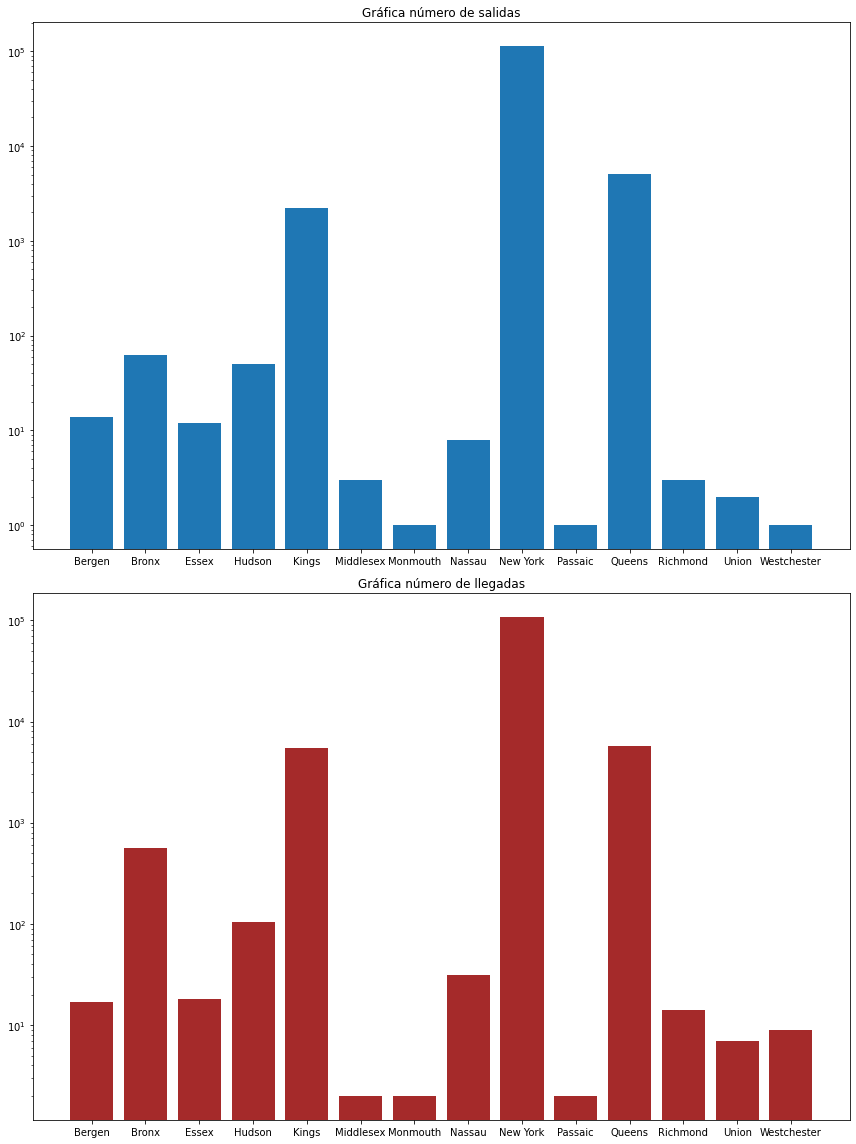

In [ ]:
grouped_df = bloque_inicio.groupby(['County'])
df_ini_recuento = grouped_df.count()
df_ini_recuento = df_ini_recuento[["pickup_datetime"]]
df_ini_recuento = df_ini_recuento.rename(columns={'pickup_datetime':'recuento'})

grouped_df = bloque_destino.groupby(['County'])
df_fin_recuento = grouped_df.count()
df_fin_recuento = df_fin_recuento[["pickup_datetime"]]
df_fin_recuento = df_fin_recuento.rename(columns={'pickup_datetime':'recuento'})

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,16))

ax1.bar(df_ini_recuento.index, np.array(df_ini_recuento.recuento))
ax1.set_yscale('log')
ax1.set_title('Gráfica número de salidas')

ax2.bar(df_fin_recuento.index, np.array(df_fin_recuento.recuento), color='brown')
ax2.set_yscale('log')
ax2.set_title('Gráfica número de llegadas')

fig.tight_layout()
fig.show()

# Predecir el precio según el resto de datos

Después de analizar aquellos datos y tendencias que consideramos interesantes para el proyecto, decidimos tratar de darles una aplicación práctica. Es decir, tratar de obtener nuevos datos a partir de los ya existentes para facilitar la información a un posible usuario.

Es por ello que, dado el conjunto que hemos estado manejando y las distribuciones que hemos analizado, decidimos investigar cómo realizar predicciones del precio de un viaje segun las características de este. Es decir, tratar de realizar una regresión lineal sobre el conjunto de datos.

Existen diversas aproximaciones mediante técnicas de Machine Learning (KNN, aproximacíon por mínimos cuadrados, SVM). Sin embargo, nosotros hemos intentado realizar una aproximación más directa. Plantearemos mediante un modelo neuronal la solución a este problema.

Para ello, usamos la librería PyTorch

In [ ]:
import torch
import torch.nn as nn

El modelo planteado se conoce como Modelo Tabular, donde combinaremos tanto datos de índole categórica como contínua. En primer lugar, agrupamos estos datos para tener en cuenta sobre qué conjuntos realizar qué procesos.

In [ ]:
#Identificar los tipos de datos en cada columna del dataset
columnas_categorias = ['Hour', 'Weekday']
columnas_continuas = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']
precios = ['fare_amount']

for cat in columnas_categorias:
  df[cat] = df[cat].astype('category')

df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDT                  datetime64[ns, UTC]
Hour                            category
Weekday                         category
dist_km_r                        float64
unique_id                          int64
a_join                           float64
dtype: object

Preparamos los datos en distintos tensores que se procesarán dentro de la red neuronal para obtener el resultado que queremos.

In [ ]:
#Juntamos todos los datos categoricos
categorias = np.stack([df[col].cat.codes.values for col in columnas_categorias], 1)
categorias = torch.tensor(categorias, dtype=torch.int64)
continuos = np.stack([df[col].values for col in columnas_continuas], axis=1)
continuos = torch.tensor(continuos, dtype=torch.float)
y = torch.tensor(df[precios].values, dtype=torch.float)
continuos #(n, 2)

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

Definimos la red. Los datos categóricos los "tabulamos" mediante el empleo de varios embeddings consecutivos, de forma que éstos luego se pueden juntar mediante una concatenación de vectores a los datos contínuos. Finalmente, pasamos los datos por una serie de capas continuas con una función de activación Leaky ReLU y los normalizamos. Finalmente, sacamos una salida de una única neurona que nos indicará el valor del precio predicho.

In [ ]:
class ModeloTabular(nn.Module):
  def __init__(self, n_embeddings, n_continuos, n_salida, n_capas, dropout=0.5):
    super().__init__()

    self.embeddings = nn.ModuleList([nn.Embedding(n_embeddings, embedding_dim) for n_embeddings, embedding_dim in n_embeddings])
    self.embedding_dropout = nn.Dropout(dropout)
    self.batch_normalization_continuous = nn.BatchNorm1d(n_continuos)

    capas_intermedias = []
    n_embeddings = sum([num_embeddings for _, num_embeddings in n_embeddings])
    entrada = n_embeddings + n_continuos

    for i in n_capas:
      capas_intermedias.append(nn.Linear(entrada, i))
      capas_intermedias.append(nn.ReLU(inplace=True))
      capas_intermedias.append(nn.BatchNorm1d(i))
      capas_intermedias.append(nn.Dropout(dropout))
      entrada = i

    self.salida = nn.Linear(n_capas[-1], n_salida)

    self.capasIntermedias = nn.Sequential(*capas_intermedias)

  def forward(self, x_categorias, x_continuas):
    embeddings = []

    for i, embedding in enumerate(self.embeddings):
      embeddings.append(embedding(x_categorias[:,i]))

    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)

    x_continuo = self.batch_normalization_continuous(x_continuas)
    x = torch.cat([x, x_continuo], 1)
    x = self.capasIntermedias(x)

    return self.salida(x)


In [ ]:
cat_szs = [len(df[col].cat.categories) for col in columnas_categorias]
emb_szs= [(size, min(50,(size+1)//2)) for size in cat_szs]
modelo = ModeloTabular(emb_szs, continuos.shape[1], 1, [200,100], dropout=0.25)
modelo

ModeloTabular(
  (embeddings): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(7, 4)
  )
  (embedding_dropout): Dropout(p=0.25, inplace=False)
  (batch_normalization_continuous): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (salida): Linear(in_features=100, out_features=1, bias=True)
  (capasIntermedias): Sequential(
    (0): Linear(in_features=22, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.25, inplace=False)
  )
)

Definimos la función de pérdidas y la estrategia de optimización para realizar nuestra regresión

In [ ]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.01)

Preparamos los datos para el entrenamiento

In [ ]:
batch_size = 60000
test_size = int(batch_size * 0.2)

cat_train  = categorias[:batch_size - test_size]
cat_test   = categorias[batch_size - test_size: batch_size]
cont_train = continuos[:batch_size - test_size]
cont_test  = continuos[batch_size - test_size: batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size: batch_size]

print(cat_test[0:10])
print(cont_test[0:10])
print(y_test[0:10])

tensor([[17,  3],
        [16,  1],
        [18,  2],
        [23,  2],
        [22,  0],
        [14,  0],
        [ 5,  4],
        [ 3,  3],
        [ 5,  1],
        [ 7,  3]])
tensor([[-73.9528,  40.7834, -73.9560,  40.7822,   1.0000,   0.2935],
        [-73.9840,  40.7550, -73.8852,  40.7727,   1.0000,   8.5440],
        [-73.9495,  40.7849, -73.9342,  40.8017,   2.0000,   2.2643],
        [-73.9564,  40.7720, -73.9194,  40.8181,   1.0000,   5.9935],
        [-74.0001,  40.7432, -73.9991,  40.7498,   1.0000,   0.7339],
        [-74.0073,  40.7163, -73.9990,  40.7200,   1.0000,   0.8153],
        [-73.9517,  40.8119, -73.9553,  40.8146,   1.0000,   0.4265],
        [-73.9479,  40.8148, -73.9872,  40.7446,   1.0000,   8.4766],
        [-73.9907,  40.7562, -73.9837,  40.7593,   1.0000,   0.6853],
        [-74.0070,  40.7296, -73.9750,  40.7582,   3.0000,   4.1704]])
tensor([[ 2.9000],
        [ 5.7000],
        [ 7.7000],
        [12.5000],
        [ 4.1000],
        [ 5.3000],
    

Definimos una función de evaluación

In [ ]:
from sklearn.metrics import r2_score
def validate_model(model):
  with torch.no_grad():
    predictions = model(cat_test, cont_test)
    r2 = r2_score(predictions, y_test)
    return r2

Entrenamos el modelo durante 500 épocas

In [ ]:
epochs = 500

losses = []
validations = []

for i in range(epochs):
  i += 1
  y_pred = modelo(cat_train, cont_train)

  loss = torch.sqrt(criterion(y_pred, y_train))
  validation = validate_model(modelo)
  losses.append(loss)
  validations.append(validation)

  if i%10 == 1:
    print(f'Epoch {i}: Loss - {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 1: Loss - 12.528535842895508
Epoch 11: Loss - 9.697495460510254
Epoch 21: Loss - 7.832075595855713
Epoch 31: Loss - 4.492849826812744
Epoch 41: Loss - 3.979475975036621
Epoch 51: Loss - 3.3646647930145264
Epoch 61: Loss - 3.304633617401123
Epoch 71: Loss - 3.2526841163635254
Epoch 81: Loss - 3.201368570327759
Epoch 91: Loss - 3.1703755855560303
Epoch 101: Loss - 3.137897491455078
Epoch 111: Loss - 3.1421897411346436
Epoch 121: Loss - 3.0950684547424316
Epoch 131: Loss - 3.085843801498413
Epoch 141: Loss - 3.110753297805786
Epoch 151: Loss - 3.0860557556152344
Epoch 161: Loss - 3.067190647125244
Epoch 171: Loss - 3.0592758655548096
Epoch 181: Loss - 3.0473837852478027
Epoch 191: Loss - 3.062471866607666
Epoch 201: Loss - 3.0515987873077393
Epoch 211: Loss - 3.034048080444336
Epoch 221: Loss - 3.0251336097717285
Epoch 231: Loss - 3.0113534927368164
Epoch 241: Loss - 3.0239720344543457
Epoch 251: Loss - 3.0080924034118652
Epoch 261: Loss - 3.001298189163208
Epoch 271: Loss - 3.00192

Una vez realizado el entrenamiento, es interesante visualizar cómo avanza el aprendizaje del mismo, a la par que, mediante la métrica empleada para su evaluación, observamos cómo su precisión (la cual es mejor cuanto más se aproxima a 0) mejora con el paso de las épocas

Mejor loss en el entrenamiento 2.880065679550171
Mejor R2 para el conjunto de validación 0.8189840799095254


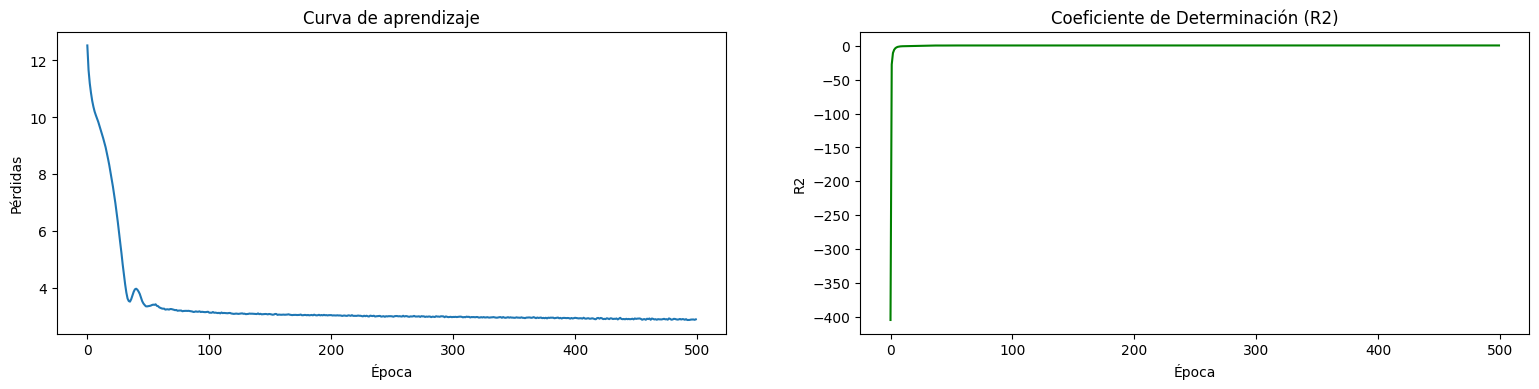

In [ ]:
x_axis = range(len(losses))
y_axis = losses
y_axis2 = validations
print(f"Mejor loss en el entrenamiento {np.min(losses)}")
print(f"Mejor R2 para el conjunto de validación {np.max(validations)}")
plt.figure(figsize=(19,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title("Curva de aprendizaje")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.plot(x_axis, y_axis)
plt.subplot(1,2,2)
plt.title("Coeficiente de Determinación (R2)")
plt.xlabel("Época")
plt.ylabel("R2")
plt.plot(x_axis, y_axis2, color='g')

Como podemos observar, mediante una red neuronal con unas pérdidas aún mejorables, es posible obtener resultados bastante precisos (0.82 de R2) que igualan a las técnicas de Machine Learning tradicional, según las propias soluciones de Kaggle, el tope actualmente está en el mismo valor.

# Trabajo futuro

*   Determinar que tasa es usada según el número de pasajeros o distancia
*   Investigar a que se deben lo valores atípicos que encontramos en las gráficas
*   Obtener la distribución tanto por meses,para la observación a un nivel más general como el deglose por horas de cada día, el nivel de uso de los taxis.
*   Buscar relaciones entre las distintas variables: precio por franja horaria, distancias recorridas, etc... en busca de anomalías que nos permitan evaluar el funcionamiento del sistema de taxis.
*   Analizar las localizaciones más y menos frecuentes: aeropuertos, barrios residenciales, centros comerciales, etc.. con el fin de ajustar precios y reactivar zonas poco visitadas.
*   Comparar el rendimiento del modelo neuronal con las técnicas de Machine Learning que mejor funcionan
*   Investigar un modelo neuronal que mejore los resultados del modelo propuesto
*   Investigar si un modelo neuronal aprende mejor mediante la inferencia de datos que relacionen las fuentes originales, lo que hemos estado trabajando en las secciones anteriores
